In [26]:
from __future__ import division, print_function
import sys

In [27]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [28]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6)) # defaut figure size
#mpl.rc('image', cmap='gray')




In [29]:
import numpy as np 
from scipy import ndimage 
from scipy import interpolate 
from scipy import optimize as optimization 
from scipy import stats
from scipy import signal as sig
from matplotlib import pyplot as plt 
%matplotlib notebook
import os
from xlrd import open_workbook 
from xlwt import Workbook 
import pandas as pd 
from pandas import DataFrame, Series  # for convenience

In [30]:
samples_conditions = pd.DataFrame(columns=['Date', 'Folder_name', 'File_name'])
samples_conditions.loc[0] = ['02-11-2017','tween20-1wt-bubble-5degrees','tween20-1wt-bubble-5degrees' ]
samples_conditions.loc[1] = ['02-11-2017','tween20-1wt-bubble-10degrees','tween20-1wt-bubble-10degrees' ]
samples_conditions.loc[2] = ['02-11-2017','tween20-1wt-bubble-15degrees','tween20-1wt-bubble-15degrees' ]
samples_conditions.loc[3] = ['02-11-2017','tween20-1wt-bubble-20degrees','tween20-1wt-bubble-20degrees' ]
samples_conditions.loc[4] = ['02-11-2017','tween80-1wt-bubble-5degrees','tween80-1wt-bubble-5degrees' ]
samples_conditions.loc[5] = ['02-11-2017','tween80-1wt-bubble-10degrees','tween80-1wt-bubble-10degrees' ]
samples_conditions.loc[6] = ['02-11-2017','tween80-1wt-bubble-15degrees','tween80-1wt-bubble-15degrees' ]
samples_conditions.loc[7] = ['02-11-2017','tween80-1wt-bubble-20degrees','tween80-1wt-bubble-20degrees' ]


In [31]:
samples_conditions.loc[8] = ['04-12-2017','tween20-1wt-bubble-25degrees','tween20-1wt-bubble-25degrees' ]
samples_conditions.loc[9] = ['04-12-2017','tween80-0.1wt-bubble-25degrees','tween80-0.1wt-bubble-25degrees' ]
samples_conditions.loc[10] = ['04-12-2017','tween80-1wt-bubble-25degrees','tween80-1wt-bubble-25degrees' ]

In [32]:
samples_conditions.loc[11] = ['05-12-2017','tween20-0.01wt-bubble-1degrees','tween20-0.01wt-bubble-1degrees' ]
samples_conditions.loc[12] = ['05-12-2017','tween20-0.1wt-bubble-1degrees','tween20-0.1wt-bubble-1degrees' ]
samples_conditions.loc[13] = ['05-12-2017','tween80-0.01wt-bubble-1degrees','tween80-0.01wt-bubble-1degrees' ]
samples_conditions.loc[14] = ['05-12-2017','tween80-0.1wt-bubble-1degrees','tween80-0.1wt-bubble-1degrees' ]
samples_conditions.loc[15] = ['05-12-2017','tween80-1wt-bubble-1degrees','tween80-1wt-bubble-1degrees' ]



In [33]:
samples_conditions.loc[16] = ['06-12-2017','tween20-bubble-0.1wt-25degrees','tween20-bubble-0.1wt-25degrees' ]
samples_conditions.loc[17] = ['06-12-2017','tween20-bubble-1wt-1degrees','tween20-bubble-1wt-1degrees' ]
samples_conditions.loc[18] = ['06-12-2017','tween20-bubble-2wt-1degrees','tween20-bubble-2wt-1degrees' ]
samples_conditions.loc[19] = ['06-12-2017','tween80-bubble-2wt-1degrees','tween80-bubble-2wt-1degrees' ]
samples_conditions.loc[20] = ['06-12-2017','water-bubble-1degrees','water-bubble-1degrees' ]


In [34]:
samples_conditions.loc[21] = ['13-03-2018','tween80-1wt-bubble-20degrees','tween80-1wt-bubble-20degrees' ]



In [35]:
samples_conditions.loc[22] = ['14-03-2018','tween20-bubble-1wt-20degrees','tween20-bubble-1wt-20degrees' ]
samples_conditions.loc[23] = ['14-03-2018','tween80-bubble-1wt-20degrees','tween80-bubble-1wt-20degrees' ]
samples_conditions.loc[24] = ['14-03-2018','water-bubble-20degrees','water-bubble-20degrees' ]


In [36]:
samples_conditions.loc[25] = ['25-05-2018','PVA-bubble-5wt-20degrees','PVA-bubble-5wt-20degrees' ]
samples_conditions.loc[26] = ['25-05-2018','f68-bubble-1wt-20degrees','f68-bubble-1wt-20degrees' ]

In [37]:
surface_tension_data = 'Z:/PhD/Experiments & Results/ESPCI/Sidhanth/tension results/Surface_Tension.xlsx'
surface_tension = pd.read_excel(surface_tension_data)
surface_tension

,File_Name,Mean,Standard_Deviation
1,tween20-1wt-bubble-10degrees,39.758414,0.906900
2,tween20-1wt-bubble-15degrees,37.303144,0.825968
3,tween20-1wt-bubble-20degrees,38.068334,0.446504
4,tween80-1wt-bubble-5degrees,40.503848,4.821169
5,tween80-1wt-bubble-10degrees,41.342833,0.317315
6,tween80-1wt-bubble-15degrees,42.769914,0.603929
7,tween80-1wt-bubble-20degrees,39.399291,0.202297
8,tween20-1wt-bubble-25degrees,38.832435,0.717547
9,tween80-0.1wt-bubble-25degrees,39.740769,0.745213
10,tween80-1wt-bubble-25degrees,41.952152,0.546387


In [79]:
File_Location ='Z:/PhD/Experiments & Results/ESPCI/Sidhanth/tension data/'

# input here the reference of the sequence you want to analyse
sample_to_analyse = 21

# read the corresponding line
File_name = samples_conditions.File_name.loc[sample_to_analyse]

# read the date from samples_conditions
Date = samples_conditions.Date.loc[sample_to_analyse] # date

# read the folder name from samples_conditions 
Folder_name = samples_conditions.Folder_name.loc[sample_to_analyse] # Folder name

# Short name to ease the analysis
sample = File_Location + Date + '/'+ Folder_name + '/' + File_name + '.xlsx'

In [80]:
# calcuting the number of trials 
num_trials = open_workbook(sample).nsheets 

# assigning the name of the sheets
name_trials = open_workbook(sample).sheet_names()



In [81]:
# reading the sample to analyse & storing it as a numpy dataframe
test_data = pd.read_excel(sample,None, header=4, usecols=[0,1])

<IPython.core.display.Javascript object>


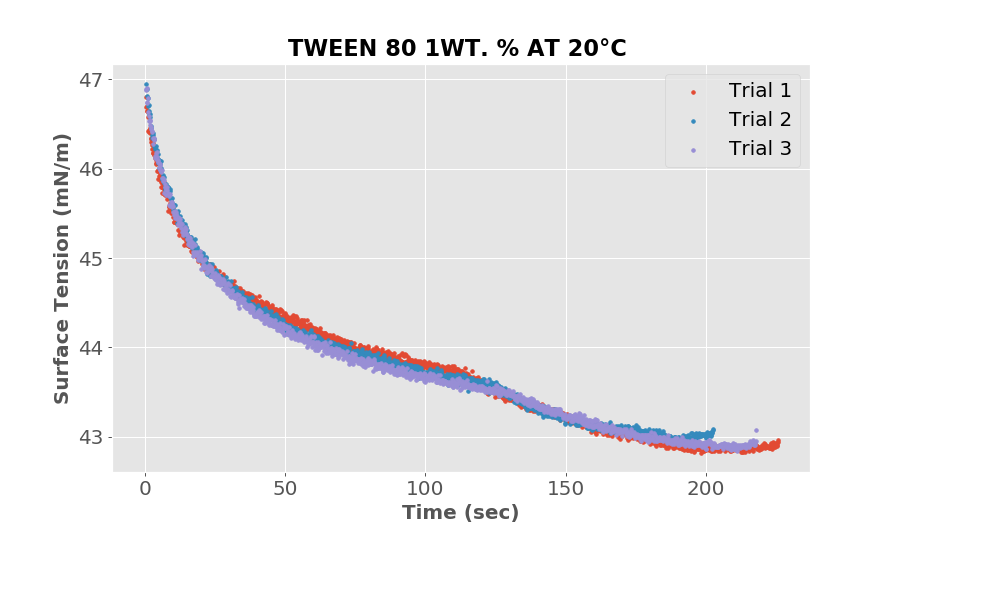

In [83]:
# plot for Surface Tension v/s Time
plt.style.use('ggplot')
plt.figure(figsize=(10,6), dpi = 100,)
plt.xlabel('foo',fontweight='bold',fontsize=16)
plt.ylabel('foo',fontweight='bold',fontsize=16)
plt.title("TWEEN 80 1WT. % AT 20°C ",fontweight='bold', fontsize=18)
plt.xlabel('Time (sec)')
plt.ylabel('Surface Tension (mN/m)')

for i in range(num_trials):
    if i == 0:
        continue
    else:
        #plt.title(Folder_name + '\n' + Date)
        plt.scatter(test_data[name_trials[i]]['Time'],test_data[name_trials[i]]['Tension'], marker='.')
        
    #plt.xscale('log')
        #plt.ylim(43,50)
        #plt.xlim(0,700)
        plt.legend(name_trials)
        plt.show()

In [84]:
plot_filename = 'Z:/PhD/Experiments & Results/ESPCI/Sidhanth/tension results/' + File_name + '.jpg'
plt.savefig(plot_filename,dpi=300)

In [39]:
for i in range(num_trials):
    tension = test_data[name_trials[i]]['Tension']
std_dev = np.std(tension)
mean = np.mean(tension)

In [40]:
d = {'File_Name': File_name, 'Mean': mean, 'Standard_Deviation':std_dev}
df = DataFrame(data=d, index =[sample_to_analyse])
surface_tension = surface_tension.append(df)
surface_tension

,File_Name,Mean,Standard_Deviation
1,tween20-1wt-bubble-10degrees,39.758414,0.906900
2,tween20-1wt-bubble-15degrees,37.303144,0.825968
3,tween20-1wt-bubble-20degrees,38.068334,0.446504
4,tween80-1wt-bubble-5degrees,40.503848,4.821169
5,tween80-1wt-bubble-10degrees,41.342833,0.317315
6,tween80-1wt-bubble-15degrees,42.769914,0.603929
7,tween80-1wt-bubble-20degrees,39.399291,0.202297
8,tween20-1wt-bubble-25degrees,38.832435,0.717547
9,tween80-0.1wt-bubble-25degrees,39.740769,0.745213
10,tween80-1wt-bubble-25degrees,41.952152,0.546387


In [41]:
surface_tension = surface_tension.sort_index()
surface_tension_filename = 'Z:/PhD/Experiments & Results/ESPCI/Sidhanth/tension results/Surface_Tension.xlsx'
surface_tension.to_excel(surface_tension_filename)

In [31]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01)# sleep for 0.01 seconds

Wall time: 13.9 s
